In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [52]:
df = pd.read_csv('우선순위_동별 통계.csv', encoding='cp949')

In [53]:
df

,인천_그리드_우선순위_lr_rank,ADM_DR_NM,count,unique,empty,filled,min,max,min_length,max_length,mean_length
0,903.0,용현5동,1,1,0,1,903.0,903.0,3,3,3
1,104.0,용현5동,1,1,0,1,104.0,104.0,3,3,3
2,104.0,학익1동,1,1,0,1,104.0,104.0,3,3,3
3,693.0,용현5동,1,1,0,1,693.0,693.0,3,3,3
4,693.0,학익1동,1,1,0,1,693.0,693.0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
3565,1348.0,NaN,1,1,0,1,1348.0,1348.0,4,4,4
3566,1692.0,NaN,1,1,0,1,1692.0,1692.0,4,4,4
3567,1889.0,NaN,1,1,0,1,1889.0,1889.0,4,4,4
3568,NaN,학익1동,1,1,1,0,NaN,NaN,0,0,0


In [54]:
df['ADM_DR_NM'].value_counts().sum()

3176

In [55]:
# 그리드와 지역경계가 겹치지 않는 grid 수가 324개
print('동 그리드 수: ',df['ADM_DR_NM'].value_counts().sum())
print('전체 그리드 수: ',len(df['ADM_DR_NM']))

동 그리드 수:  3176
전체 그리드 수:  3570


In [56]:
df.dropna(axis=0, inplace=True)

## 순위 500

In [57]:
df_500 = df[df['인천_그리드_우선순위_lr_rank'] < 500]

In [60]:
df_500['인천_그리드_우선순위_lr_rank'].value_counts()

19.0     4
106.0    4
198.0    3
187.0    3
132.0    3
        ..
312.0    1
482.0    1
17.0     1
304.0    1
485.0    1
Name: 인천_그리드_우선순위_lr_rank, Length: 499, dtype: int64

In [61]:
df_500

,인천_그리드_우선순위_lr_rank,ADM_DR_NM,count,unique,empty,filled,min,max,min_length,max_length,mean_length
1,104.0,용현5동,1,1,0,1,104.0,104.0,3,3,3
2,104.0,학익1동,1,1,0,1,104.0,104.0,3,3,3
71,245.0,용현5동,1,1,0,1,245.0,245.0,3,3,3
73,34.0,용현5동,1,1,0,1,34.0,34.0,2,2,2
75,249.0,용현5동,1,1,0,1,249.0,249.0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
3078,188.0,주안6동,1,1,0,1,188.0,188.0,3,3,3
3157,39.0,관교동,1,1,0,1,39.0,39.0,2,2,2
3158,78.0,관교동,1,1,0,1,78.0,78.0,2,2,2
3163,13.0,관교동,1,1,0,1,13.0,13.0,2,2,2


In [62]:
pd.DataFrame(df_500.groupby(['ADM_DR_NM'])['인천_그리드_우선순위_lr_rank'])

,0,1
0,관교동,3157 39.0 3158 78.0 3163 13.0 3164...
1,도화1동,1091 19.0 1159 137.0 1221 437.0 1283...
2,도화2·3동,770 191.0 772 174.0 830 205.0 893 ...
3,숭의1·3동,239 207.0 240 98.0 241 33.0 243 ...
4,숭의2동,372 40.0 421 50.0 425 59.0 473 ...
5,숭의4동,717 54.0 778 302.0 832 311.0 834 ...
6,용현1·4동,686 106.0 688 221.0 690 189.0 743 ...
7,용현2동,131 465.0 166 423.0 202 364.0 206 ...
8,용현3동,635 186.0 678 355.0 680 120.0 682 ...
9,용현5동,1 104.0 71 245.0 73 34.0 75 ...


In [63]:
df_500_new = df_500.groupby(['ADM_DR_NM'])['인천_그리드_우선순위_lr_rank'].apply(list).reset_index()

In [64]:
df_500_new

,ADM_DR_NM,인천_그리드_우선순위_lr_rank
0,관교동,"[39.0, 78.0, 13.0, 102.0]"
1,도화1동,"[19.0, 137.0, 437.0, 198.0, 135.0, 453.0, 477...."
2,도화2·3동,"[191.0, 174.0, 205.0, 285.0, 448.0, 361.0, 260..."
3,숭의1·3동,"[207.0, 98.0, 33.0, 190.0, 134.0, 272.0, 25.0,..."
4,숭의2동,"[40.0, 50.0, 59.0, 37.0, 301.0, 92.0, 117.0, 2..."
5,숭의4동,"[54.0, 302.0, 311.0, 171.0, 390.0, 458.0, 61.0..."
6,용현1·4동,"[106.0, 221.0, 189.0, 447.0, 167.0, 14.0, 351...."
7,용현2동,"[465.0, 423.0, 364.0, 303.0, 363.0, 190.0, 271..."
8,용현3동,"[186.0, 355.0, 120.0, 161.0, 106.0, 294.0, 31...."
9,용현5동,"[104.0, 245.0, 34.0, 249.0, 112.0, 70.0, 256.0..."


In [66]:
df_500_new['ADM_DR_NM'].unique()

array(['관교동', '도화1동', '도화2·3동', '숭의1·3동', '숭의2동', '숭의4동', '용현1·4동',
       '용현2동', '용현3동', '용현5동', '주안1동', '주안2동', '주안3동', '주안4동', '주안5동',
       '주안6동', '주안7동', '주안8동', '학익1동', '학익2동'], dtype=object)

In [69]:
bins = np.arange(1,600,100)
bins

array([  1, 101, 201, 301, 401, 501])

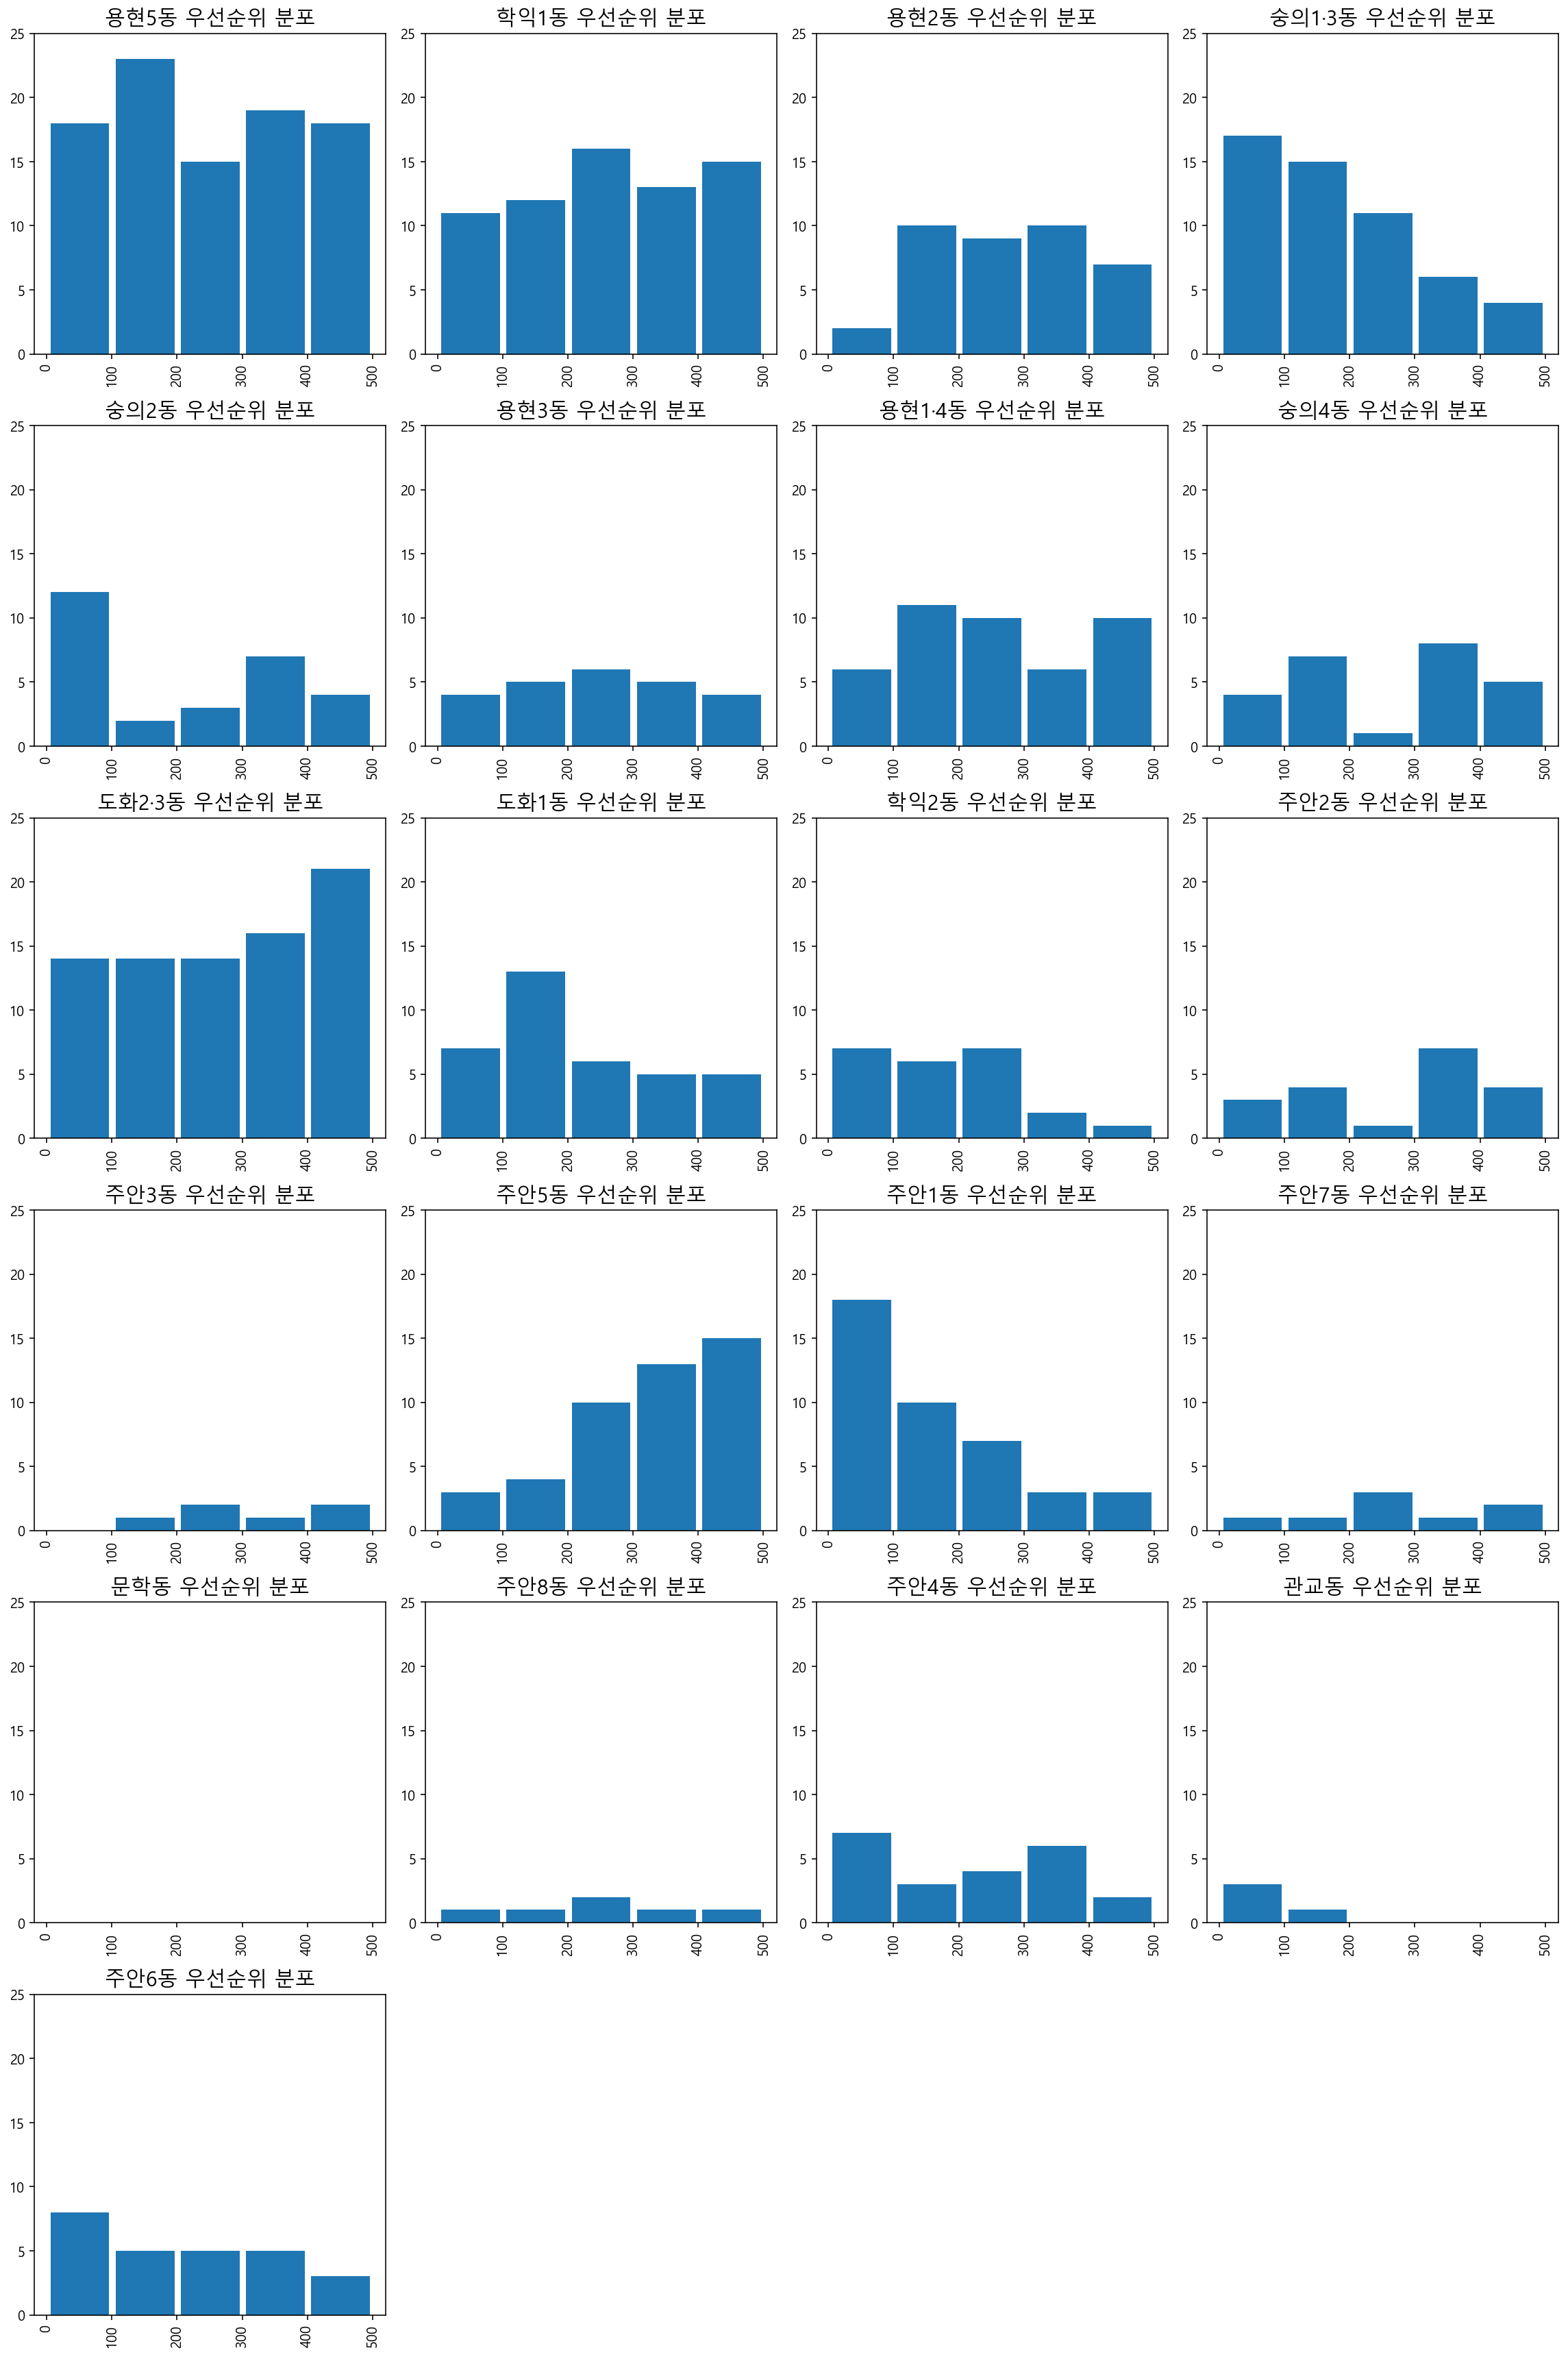

In [70]:
plt.figure(figsize=(16,24)) # 먼저 창을 만들고
n=1
for spot_ in df['ADM_DR_NM'].unique():
    d_ = df_500_new[df_500_new['ADM_DR_NM'] == spot_]['인천_그리드_우선순위_lr_rank']
    ax = plt.subplot(6,4,n) # for문을 돌면서 Axes를 추가
    plt.title("%s 우선순위 분포" % spot_, fontsize=15)
    plt.hist(d_,rwidth = 0.9, bins=bins) # 그래프 추가
    plt.xticks(rotation=90)
    plt.ylim(0,25)
    n+=1
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()